## Computer Vision(CS 436, CS5310, EE513) Programming Assignment#2

###  In this part of assignment you'll be determining the intrinsic and extrinsic parameters of a your mobile phone camera using camera calibration techniques. 
### Undergrad students have to strictly follow the handout and implement the procedure outlined in the handout. Grad students can follow the handout and get full marks but they are free to experiment and they can look at other ways of finding the projection matrix but keep in mind that you are not allowed to copy code or pictures, the picture you use for calibration should be your own and should be taken from you own mobile phone camera. You should be able to explain every step of your implementation.
### For this assignment we are using the direct linear transformation method

In [0]:
# from google.colab import drive
# drive.mount('/content/drive')

In [0]:
#Imports
import matplotlib
import cv2
from mpl_toolkits import mplot3d
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib import image as mpimg
from matplotlib.pyplot import figure
import seaborn as sns
import numpy as np
import matplotlib.pylab as pl
from matplotlib.colors import ListedColormap
%matplotlib notebook

## Part 1 (30 marks for undergrad)
### Take image of a calibration object with your camera phone. Unlike shown in the lecture slides here you are required to choose an appropriate 3D calibration object (i.e. a nonplanar object, a rubiks cube for example) so that the world points on that object span a 3-dimensional space, and the image points are easy to mark. Place the calibration object on a horizontal plane, such as a tabletop, or floor, to take the image. Mark at least 20 image points as carefully as possible and establish their world coordinates in millimeters. 
### From this data, compute the camera matrix P. Show the original points and the back-projected camera points on a single image and compute the average re-projection error.

Image Dimensions (WxH): 3480x4640


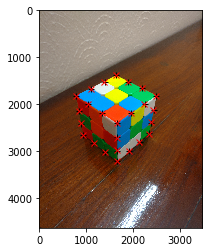

Average Error: 6.674175 pixels


In [63]:
#TODO
h,w = 4640, 3480
# cube = np.array(mpimg.imread('rcube.jpg'))
# cube.setflags(write=1)
# h,w,_ = cube.shape
n = 25 # 25 points
print("Image Dimensions (WxH): %dx%d" %(w,h))
#World center = (0,0,0)
L = 18 #sub-cube Length in mm 
       #0   1   2    3    4   5    6    7   8    9    10   11   12   13   14   15   16   17   18   19   20   21   22   23   24 
X = [0,  L,  L*2, L*3, 0,  0,   0,   0,  0,   0,   L*3, L*3, L*3, 0,   0,   0,   L,   L*3, 0,   L*2, L*2, L*3, 0,   L,   L*3]
Y = [0,  0,  0,   0,   L,  L*2, L*3, 0,  0,   0,   0,   0,   0,   L*3, L*3, L*3, L*3, L,   L*2, 0,   L*3, L*2, L,   0,   L*3]
Z = [0,  0,  0,   0,   0,  0,   0,   L,  L*2, L*3, L,   L*2, L*3, L,   L*2,  L*3, 0,  0,   L*3, L*3, 0,   0,   L*3, L*3, 0  ]

# x = [1186, 1512, 1790, 2009,  859,  579,  357, 1173, 1170, 1170, 1948, 1874, 1828,  418,  474,  510,  681, 1706,  699, 1663,  961, 1420,  924,  1440, 1195]
# y = [1525, 1341, 1186, 1056, 1339, 1173, 1038, 1887, 2203, 2440, 1390, 1683, 1902, 1364, 1660, 1895,  921,  931, 2046, 2048,  811,  826, 2239,  2244,  734]

     #0     1     2     3      4     5     6    7     8     9     10    11    12     13    14    15    16     17    18    19    20    21    22    23     24
x = [1653, 1950, 2244, 2487, 1338, 1041,  789, 1653, 1653, 1653, 2436, 2382, 2340,  846,  897,  942, 1098, 2184, 1149, 2148, 1392, 1890, 1395, 1917, 1641]
y = [2406, 2193, 1995, 1821, 2196, 1998, 1830, 2712, 2991, 3222, 2130, 2403, 2619, 2139, 2424, 2652, 1668, 1665, 2820, 2802, 1518, 1518, 3015, 3006, 1386]

# A Matrix
A = [] #50x12
for i in range(n): #given n correspondences
  Xi, Yi, Zi, xi, yi = X[i], Y[i], Z[i], x[i], y[i]
  A.append([Xi, Yi, Zi,  1,  0,   0,   0,  0, -xi*Xi, -xi*Yi, -xi*Zi, -xi])
  A.append([0,  0,   0,  0, Xi,  Yi,  Zi,  1, -yi*Xi, -yi*Yi, -yi*Zi, -yi])
A = np.array(A)

# P Matrix
u, s, vh = np.linalg.svd(A)
# get last row of vh [hermitian transposed v] (or v's last col)
Pl = vh[-1] # list of P values (column wise), nullspace
P = np.array([Pl[0:4], Pl[4:8], Pl[8:12]]) # 3x4

'''
P [[-8.20383497e-03  4.72231732e-03 -2.59036293e-03 -5.65515225e-01]
   [ 1.59252214e-03  1.87628849e-03 -1.01405976e-02 -8.24613371e-01]
   [-1.17351350e-06 -9.84790331e-07 -1.55059231e-06 -3.42381904e-04]]
'''

# Verifying P matrix by calculating back-projected camera points and plotting them with the original ones (x,y)
xb = [] # back-projected points x coords
yb = []

XYZ = np.dstack((X,Y,Z,np.ones(n)))[0].T # 4xn, n = 25
xyh = np.matmul(P, XYZ) #(3xn) = (3x4) * (4xn)
xb, yb = np.divide(xyh[0], xyh[2]), np.divide(xyh[1], xyh[2])
plt.plot(x, y, 'k+')
plt.plot(xb, yb, 'rx')
# plt.imshow(cube)
plt.show()

# Computing average re-projection error
# average euclidean distance
from math import sqrt

avg = 0
for i in range(n):
  avg += sqrt((y[i]-yb[i])**2 + (x[i]-xb[i])**2)
avg /= n
print("Average Error: %f pixels" % avg)
# 6.674175 pixels


## Part 2 (10 marks)
### Since we are using direct linear transformation, you are required to implement QR decomposition of a matrix

In [0]:
#TODO
from numpy.linalg import qr
from scipy.linalg import rq

def myRQ(matrix):
  Q, L = qr(np.linalg.inv(matrix))
  K, R = np.linalg.inv(L), Q.T
  return K, R

## Part 3 (30 marks)
### Compute camera center C  intrinsic matrix K and Rotation matrix R. Generate a 3D figure which shows the calibration points, the camera center and the orientation of the camera in 3D (You also have to plot the points for 3d calibration object as well)

('Camera Center:', -80.70811662941988, -80.14939557319592, -108.82260204458596)
('Matrix K', array([[-4.08496742e+03, -3.43976225e+01,  1.89283958e+03],
       [ 0.00000000e+00,  4.06583798e+03,  2.52717785e+03],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]]))
('Matrix R', array([[-0.6675514 ,  0.74384108,  0.0327959 ],
       [-0.51432523, -0.49252879,  0.70205765],
       [ 0.53837225,  0.45179181,  0.71136452]]))


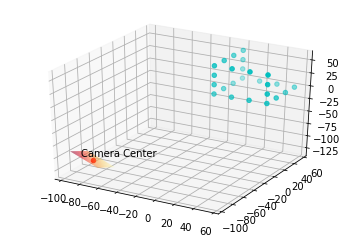

In [65]:
#TODO
# CAMERA CENTER -- last column of V transpose from svd(P) == nullspace since PC = 0
u, s, vh = np.linalg.svd(P)
cam = vh[-1] # camera center
cam = (cam/cam[-1])[:-1] # normalize and get first 3
print("Camera Center:", cam[0],cam[1],cam[2])

# K, R from RQ decomposition
KR = P[:3,:3] # exclude last col, for ns
K, R = myRQ(KR)
ppx,ppy,ppz = K[:,-1]
K = K/K[-1,-1] # normalized last column for K
px, py = K[0,2], K[1,2] # principal point

print("Matrix K", K)
print("Matrix R", R)

ax = plt.figure().gca(projection='3d')  

# principal plane
plane = P[2] #1x4 
plane /= plane[-1] # divide by d
a,b,c,d = plane
n = np.array([a,b,c]) # normal vector

xx, yy = np.meshgrid(range(-15,15), range(-15,15)) # 30x30 meshgrid spanning over origin
xx, yy = xx + cam[0], yy + cam[1] # grid translated to camera coordinates instead of world origin (camera frame)
z = (-n[0] * xx - n[1] * yy - d) * 1. / n[2] #x,y,z for plane
ax.plot_surface(xx, yy, z, alpha=0.7, cmap='YlOrRd')

ax.scatter3D(X, Y, Z, color='c') # points for 3D object
ax.scatter3D(cam[0], cam[1], cam[2], color='r') # camera center
ax.text(cam[0]-15, cam[1]+3, cam[2], "Camera Center") # text label
plt.show()

## Part 4 (20 marks)
### Search for the sensor information of your camera on the web. From this information, compute the focal length in mm. The following link may be useful to look up sensor sizes in mm(since most smartphone sensor sizes will be quoted in inches):
https://www.digicamdb.com/sensor-sizes/
### now re-plot everything along with the principal point of camera

mx, my: 885.496183, 887.189293 px/mm
Principal Point on Image Plane: 1892.839585, 2527.177847 px
fx, fy: 4.613196, 4.582830 mm
Image Plane: 


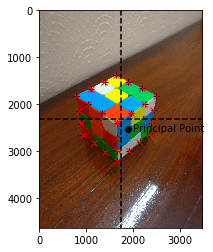

Re-plotted 3D


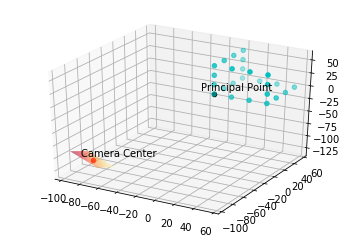

In [66]:
#TODO
# Main Camera 16.4MP - 5.23 x 3.93 mm
'''
camspecs = np.array(mpimg.imread('cameraSpecs.jpg'))
plt.axis('off')
plt.imshow(camspecs[150:-500,:])
plt.show()
'''
# sensor width and height
sx, sy = 3.93, 5.23

mx, my = w/sx, h/sy
mxf, myf = np.abs(K[0,0]), np.abs(K[1,1])
fx, fy = mxf/mx, myf/my

# Actual focal length 4.26 for main camera, 6.6x crop factor
print("mx, my: %f, %f px/mm" %(mx,my))
print("Principal Point on Image Plane: %f, %f px" %(px,py))
print("fx, fy: %f, %f mm" %(fx, fy))

print("Image Plane: ")
plt.plot(x, y, 'k+')
plt.plot(xb, yb, 'rx')
plt.plot(px, py, 'ko')
plt.text(px+100,py+50, "Principal Point")
plt.plot([0, w], [h/2, h/2], 'k--')
plt.plot([w/2, w/2], [0, h], 'k--')
# plt.imshow(cube)
plt.show()

print("Re-plotted 3D")
ax = plt.figure().gca(projection='3d')  
ax.plot_surface(xx, yy, z, alpha=0.7, cmap='YlOrRd')
ax.scatter3D(X, Y, Z, color='c') # points for 3D object
ax.scatter3D(cam[0], cam[1], cam[2], color='r') # camera center
ax.text(cam[0]-15, cam[1]+3, cam[2], "Camera Center") # text label
ax.scatter3D(ppx, ppy, ppz, color='k') # camera center
ax.text(ppx-15, ppy+3, ppz, "Principal Point") # text label
plt.show()

## Part 5 (10 marks)
### Suggest a few ways to minimize the error in this whole procedure. Since you are suggesting these, go back and try repeating/tweaking the whole algorithm and see if the things you suggest actually have an impact on the solution (it is perfectly fine if your propositions are not resulting in anything positive) (Suggest at least 2)

In [67]:
# your answer/code goes here
'''
- We can further modify the calibration settings, like considering camera/pixel skew and any other types of distortions like radial or tangential.
- More calibration images may be taken from different 3D orientations/point-perspectives with all feature points in view.
- Increasing the number of feature points taken on the image for correspondences also leads to a smaller reprojection error (tested by increasing points n from 20 to 25).
- The 3D calibration object/cube selected is assumbed to be perfectly cubic in dimensions, like every sub-cube is assumed as 18x18x18 mm^3 which leads to inaccuracy.
- Had an issue with a multi-camera cellphone and AI image capture mode initially, as well as reduced image resolution leading to incorrect answers, which should be avoided.
'''

'\n- We can further modify the calibration settings, like considering camera/pixel skew and any other types of distortions like radial or tangential.\n- More calibration images may be taken from different 3D orientations/point-perspectives with all feature points in view.\n- Increasing the number of feature points taken on the image for correspondences also leads to a smaller reprojection error (tested by increasing points n from 20 to 25).\n- The 3D calibration object/cube selected is assumbed to be perfectly cubic in dimensions, like every sub-cube is assumed as 18x18x18 mm^3 which leads to inaccuracy.\n- Had an issue with a multi-camera cellphone and AI image capture mode initially, as well as reduced image resolution leading to incorrect answers, which should be avoided.\n'

## Part 6 (Grad Only, 20 marks for this part)(Upto 10 marks bonus for Undergrads)
### Look up the existing ways of camera calibration and draw a comparisons between the one you've implemented above. While comparing the two algorithms, you should be able the explain the computation/space complexity of the two algorithms, the assumptions that are kept in both algorithms and under what circumstances each would fail. You should also explain the equations involved in both algorithms.
### In case you have opted for not following the handout (i.e looking up and implementing your own algo) you can draw comparison between the algorithm that you've written and the one proposed in the handout (DLT)

In [68]:
# your answer goes here
'''
Our Algorithm:
Take a set of corresponding 2D and 3D points
Calculate P by pseudo-inverse method, making the A matrix and applying SVD, then getting the column of V (eigenvector)
corresponding to the smallest eigenvalue. This is reshaped to become P (3x4) matrix.
Since PC = 0, where C is the camera center, C can be found using the nullspace calculation of P.
K and R are found by taking the RQ decomposition of the first 3 columns of P. (K is upper triangle and R is orthonormal)
The last row of P gives us the principal plane (a,b,c,d). The last column of K gets us the principal point (px,py,pz)
Focal length is calculated by dividing the K[0][0] and K[1][1] mxf and myf values respectively by the mx and my factors which are image / camera sensor sizes respectively.

Another Algorithm - Zhang's method:
In a first step, an approximation of the estimated projection matrix H between the calibration target
and the image plane is determined using DLT method. 
Subsequently, applying self-calibration techniques to obtained the image of the absolute conic matrix.
The main contribution of Zhang method is how to extract a constrained instrinsic K and n numbers of R
and T calibration parameters from n pose of the calibration target.

Reference: https://en.wikipedia.org/wiki/Camera_resectioning
'''

"\nOur Algorithm:\nTake a set of corresponding 2D and 3D points\nCalculate P by pseudo-inverse method, making the A matrix and applying SVD, then getting the column of V (eigenvector)\ncorresponding to the smallest eigenvalue. This is reshaped to become P (3x4) matrix.\nSince PC = 0, where C is the camera center, C can be found using the nullspace calculation of P.\nK and R are found by taking the RQ decomposition of the first 3 columns of P. (K is upper triangle and R is orthonormal)\nThe last row of P gives us the principal plane (a,b,c,d). The last column of K gets us the principal point (px,py,pz)\nFocal length is calculated by dividing the K[0][0] and K[1][1] mxf and myf values respectively by the mx and my factors which are image / camera sensor sizes respectively.\n\nAnother Algorithm - Zhang's method:\nIn a first step, an approximation of the estimated projection matrix H between the calibration target\nand the image plane is determined using DLT method. \nSubsequently, applyin